### Import des Bibliothéques
---

In [178]:
import os
import boto3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from dotenv import load_dotenv


# import plotly.graph_objects as go
# import plotly.io as pio

### Chargement secrets.env et connection à S3
---

In [179]:
load_dotenv("secrets.env")

AWS_KEY = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET = os.getenv("AWS_SECRET_ACCESS_KEY")
BUCKET_NAME = os.getenv("AWS_BUCKET_NAME")

s3 = boto3.client(
    "s3",
    aws_access_key_id=AWS_KEY,
    aws_secret_access_key=AWS_SECRET
)

### Chargement du fichier excel du S3
---

In [180]:
# chargement fichier du S3
s3.download_file(BUCKET_NAME, "data_wip_v5.xlsx", "geodechetS3.xlsx")


# Lecture des fichiers 
df = pd.read_excel("geodechetS3.xlsx")


### L'EDA Analyse exploratoire des données Basique
---

In [181]:
# Statistiques basiques
print("Nombre de lignes : {}".format(df.shape[0]))
print("Nombre de colonnes :", df.shape[1])

print("\nAperçu du dataset : ")
display(df.head())

print("\nInformation du dataset : ")
print(df.info())

# statistique sur les valeurs
print("\nValeurs uniques : ")
display(df.nunique())

print("\nValeurs dupliquées : ")
display(df.duplicated().sum())

Nombre de lignes : 672
Nombre de colonnes : 38

Aperçu du dataset : 


,Code_Dpt,Département,Région,année,densité_n-2,densité,pop_globale_n-2,pop_globale,tranche_age_0-24,tranche_age_25-59,...,Total_autres_dechets_n-2,Total_autres_dechets,Déblais_gravats_n-2,Déblais_gravats,Déchets_verts_n-2,Déchets_verts,Encombrants_n-2,Encombrants,Matériaux_recyclables_n-2,Matériaux_recyclables
0,01,Ain,Auvergne-Rhône-Alpes,2009,99.2,101.8,573868,588857,188068,281744,...,3298,4803,35646,37593,43862,45013,33967,34729,23227,25405
1,02,Aisne,Hauts-de-France,2009,73.1,73.4,537232,539547,170369,249910,...,421,1180,22870,24380,23034,24539,29857,31593,9266,10542
2,03,Allier,Auvergne-Rhône-Alpes,2009,46.6,46.6,342749,342559,86913,152570,...,1164,1867,13150,14374,17054,18612,11001,11932,7620,8564
3,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur,2009,22.5,23.0,156203,159510,43500,70222,...,397,803,9577,11228,7093,8280,8652,9006,6829,7327
4,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur,2009,23.9,24.5,132529,135883,37235,62716,...,696,1048,7943,8509,5857,6121,7709,7938,10344,10344



Information du dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Code_Dpt                                   672 non-null    object 
 1   Département                                672 non-null    object 
 2   Région                                     672 non-null    object 
 3   année                                      672 non-null    int64  
 4   densité_n-2                                672 non-null    float64
 5   densité                                    672 non-null    float64
 6   pop_globale_n-2                            672 non-null    int64  
 7   pop_globale                                672 non-null    int64  
 8   tranche_age_0-24                           672 non-null    int64  
 9   tranche_age_25-59                          672 non-null    int64  
 10 

Code_Dpt                                      97
Département                                   96
Région                                        13
année                                          7
densité_n-2                                   95
densité                                      537
pop_globale_n-2                              672
pop_globale                                  672
tranche_age_0-24                             670
tranche_age_25-59                            670
tranche_age_60+                              672
csp1_agriculteurs                            636
csp2_artisans_commerçant_chef_entreprises    662
csp3_cadres_professions_intellectuelles      664
csp4_professions_intermédiaires              671
csp5_employés                                672
csp6_ouvriers                                668
csp7_retraités                               670
csp8_sans_activité                           671
nbre_entreprises                             570
nb_salaries_secteur_


Valeurs dupliquées : 


0

### L'EDA Analyse exploratoire des données Approfondie
---

In [182]:
# Analyse col Année : répartition année
print("\nColonne Année : Répartition des données par Année\n")
print(df["année"].value_counts().sort_index())

# Analyse col Code_Dpt
print("\nColonne Code_Dpt : Modification type 'Code_Dpt' en str\n")
df["Code_Dpt"] = df["Code_Dpt"].astype(str)
print(sorted(df["Code_Dpt"].unique()))




Colonne Année : Répartition des données par Année

année
2009    96
2011    96
2013    96
2015    96
2017    96
2019    96
2021    96
Name: count, dtype: int64

Colonne Code_Dpt : Modification type 'Code_Dpt' en str

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95']


In [183]:
# Analyse évolution des déchets 
print("--- Evolution des Déchets --- \n")
# Variables col_typologes  
cat_dechets = [
    "Total_autres_dechets",
    "Déblais_gravats",
    "Déchets_verts",
    "Encombrants",
    "Matériaux_recyclables"
]
# Visualisation Tonnage total par année par typo de déchets
df_année = df.groupby("année")[cat_dechets].sum().reset_index()
display(df_année.head(7))

# visu graph avec plotly (mettre au format long avant graph)
# format long du df_année
df_année_long=df_année.melt(
    id_vars="année",
    value_vars=cat_dechets,
    var_name="Type_dechet",
    value_name='Tonnage'
)
display(df_année_long.head(15))

#graph bar evolution des typologie de déchets en 12 ans (2009 à 2021)
fig=px.bar(
    df_année_long,
    x='année',
    y='Tonnage',
    color='Type_dechet',
    title='Evolution des déchets par typologie de 2009 à 2021'
)
fig.show()

# Analyse evolution population
print("--- Evolution de la Population --- \n")
# visu plotly
total_par_annee = df.groupby("année",as_index=False)["pop_globale"].sum()# Somme globale par année

fig = px.bar(
    total_par_annee,
    x="année",
    y="pop_globale",
    title="Évolution de la population de 2009 à 2021",
)
fig.show()

# Comparaison évolution des déchets et evolution population
print("--- Evolution des Déchets vs Evolution de la population (2009 à 2021) --- \n")

pop_total = df.groupby("année")["pop_globale"].sum().reset_index()
pop_total["evol_%"] = (pop_total["pop_globale"] - pop_total["pop_globale"].iloc[0]) / pop_total["pop_globale"].iloc[0] * 100 # ilo[0] valeur de ref 2009 = 0%
pop_total["Type"] = "Population"

dechets_total = df.groupby("année")["tonnage_dechet_produit"].sum().reset_index()
dechets_total["evol_%"] = (dechets_total["tonnage_dechet_produit"] - dechets_total["tonnage_dechet_produit"].iloc[0]) / dechets_total["tonnage_dechet_produit"].iloc[0] * 100
dechets_total["Type"] = "Déchets"

df_comparaison = pd.concat([pop_total[["année", "evol_%", "Type"]], 
                     dechets_total[["année", "evol_%", "Type"]]])# Fusion des 2 DataFrames

#visu plotly
df_comparaison['evol_text'] = df_comparaison['evol_%'].round(1).astype(str) + '%'

fig = px.line(
    df_comparaison,
    x="année",
    y="evol_%",
    color="Type",
    markers=True,
    text="evol_text",
    title="Évolution Population vs Evolution Déchets (2009 à 2021)"
)
fig.update_traces(textposition="top center")# Positionner le texte au-dessus des points
fig.show()

# Analyse déchets/Région vs population/déchets
# Extraire la liste des régions
regions = df['Région'].unique()
regions_sorted = sorted(regions)  # optionnel, juste pour l'ordre

# Créer une palette de couleurs (ici 13 couleurs avec Plotly)
palette = px.colors.qualitative.Plotly  # ou "D3", "Set3", etc.
color_map = {region: palette[i % len(palette)] for i, region in enumerate(regions_sorted)}

# visu déchets par region 
print("--- Répartition des Déchets par Région ---\n")
df_region_dechets = df.groupby("Région")["tonnage_dechet_produit"].sum().reset_index()
df_region_dechets_sorted = df_region_dechets.sort_values(by="tonnage_dechet_produit", ascending=False)

fig1 = px.bar(
    df_region_dechets_sorted,
    x="Région",
    y="tonnage_dechet_produit",
    color="Région",
    color_discrete_map=color_map,
    title="Répartition des Déchets produits par Région (2009-2021)"
)
fig1.show()

# Visu population par région 
print("--- Répartition de la Population par Région ---\n")
df_region_pop = df.groupby("Région")["pop_globale"].sum().reset_index()
df_region_pop_sorted = df_region_pop.sort_values(by="pop_globale", ascending=False)

fig2 = px.bar(
    df_region_pop_sorted,
    x="Région",
    y="pop_globale",
    color="Région",
    color_discrete_map=color_map,
    title="Répartition de la Population par Région (2009-2021)"
)
fig2.show()
print("Lorsque l’on compare la production de déchets à la population par région, on observe que la relation n’est pas linéaire.\nCertaines régions, comme Auvergne-Rhône-Alpes, Occitanie ou Bretagne, présentent une production de déchets plus élevée\n que ce que leur poids démographique. À l’inverse, l’Île-de-France se distingue par une production de déchets relativement faible\nau regard de sa population.\n")

# Tonnage par type de déchets
print("--- Répartition par typologie de Déchets ---\n")

df_année_type = df_année_long.groupby("Type_dechet")['Tonnage'].sum().reset_index()
df_année_type_sorted = df_année_type.sort_values(by='Tonnage', ascending=False)

fig=px.bar(
    df_année_type_sorted,
    x='Type_dechet',
    y='Tonnage',
    title= 'Répartition typologie de déchets de 2009 à 2021'
)
fig.show()


--- Evolution des Déchets --- 



,année,Total_autres_dechets,Déblais_gravats,Déchets_verts,Encombrants,Matériaux_recyclables
0,2009,446032,3372112,3515732,2789468,1638879
1,2011,497163,3642704,3511923,3073832,1874614
2,2013,487254,3551432,3789432,3204956,1910526
3,2015,623492,3584449,3987844,3174956,2024770
4,2017,1010772,3640751,4252304,3313959,2131285
5,2019,1231419,3711769,4113623,3397371,2221061
6,2021,1569542,4283270,4416866,3588230,2387473


,année,Type_dechet,Tonnage
0,2009,Total_autres_dechets,446032
1,2011,Total_autres_dechets,497163
2,2013,Total_autres_dechets,487254
3,2015,Total_autres_dechets,623492
4,2017,Total_autres_dechets,1010772
5,2019,Total_autres_dechets,1231419
6,2021,Total_autres_dechets,1569542
7,2009,Déblais_gravats,3372112
8,2011,Déblais_gravats,3642704
9,2013,Déblais_gravats,3551432


--- Evolution de la Population --- 



--- Evolution des Déchets vs Evolution de la population (2009 à 2021) --- 



--- Répartition des Déchets par Région ---



--- Répartition de la Population par Région ---



Lorsque l’on compare la production de déchets à la population par région, on observe que la relation n’est pas linéaire.
Certaines régions, comme Auvergne-Rhône-Alpes, Occitanie ou Bretagne, présentent une production de déchets plus élevée
 que ce que leur poids démographique. À l’inverse, l’Île-de-France se distingue par une production de déchets relativement faible
au regard de sa population.

--- Répartition par typologie de Déchets ---



### L'Eda - tableau de corrélation
---

In [171]:
print(df.columns)

Index(['Code_Dpt', 'Département', 'Région', 'année', 'densité_n-2', 'densité',
       'pop_globale_n-2', 'pop_globale', 'tranche_age_0-24',
       'tranche_age_25-59', 'tranche_age_60+', 'csp1_agriculteurs',
       'csp2_artisans_commerçant_chef_entreprises',
       'csp3_cadres_professions_intellectuelles',
       'csp4_professions_intermédiaires', 'csp5_employés', 'csp6_ouvriers',
       'csp7_retraités', 'csp8_sans_activité', 'nbre_entreprises',
       'nb_salaries_secteur_agricole', 'nb_salaries_secteur_industrie',
       'nb_salaries_secteur_service', 'nbre_entreprises_agricole',
       'nbre_entreprises_industrie', 'nbre_entreprises_service',
       'tonnage_dechet_produit_n-2', 'tonnage_dechet_produit',
       'Total_autres_dechets_n-2', 'Total_autres_dechets',
       'Déblais_gravats_n-2', 'Déblais_gravats', 'Déchets_verts_n-2',
       'Déchets_verts', 'Encombrants_n-2', 'Encombrants',
       'Matériaux_recyclables_n-2', 'Matériaux_recyclables'],
      dtype='object')


In [ ]:
# Supprimer typologie des déchets
liste_sup = ['tonnage_dechet_produit_n-2','tonnage_dechet_produit',
       'Total_autres_dechets_n-2', 'Total_autres_dechets',
       'Déblais_gravats_n-2', 'Déblais_gravats', 'Déchets_verts_n-2',
       'Déchets_verts', 'Encombrants_n-2', 'Encombrants',
       'Matériaux_recyclables_n-2', 'Matériaux_recyclables']

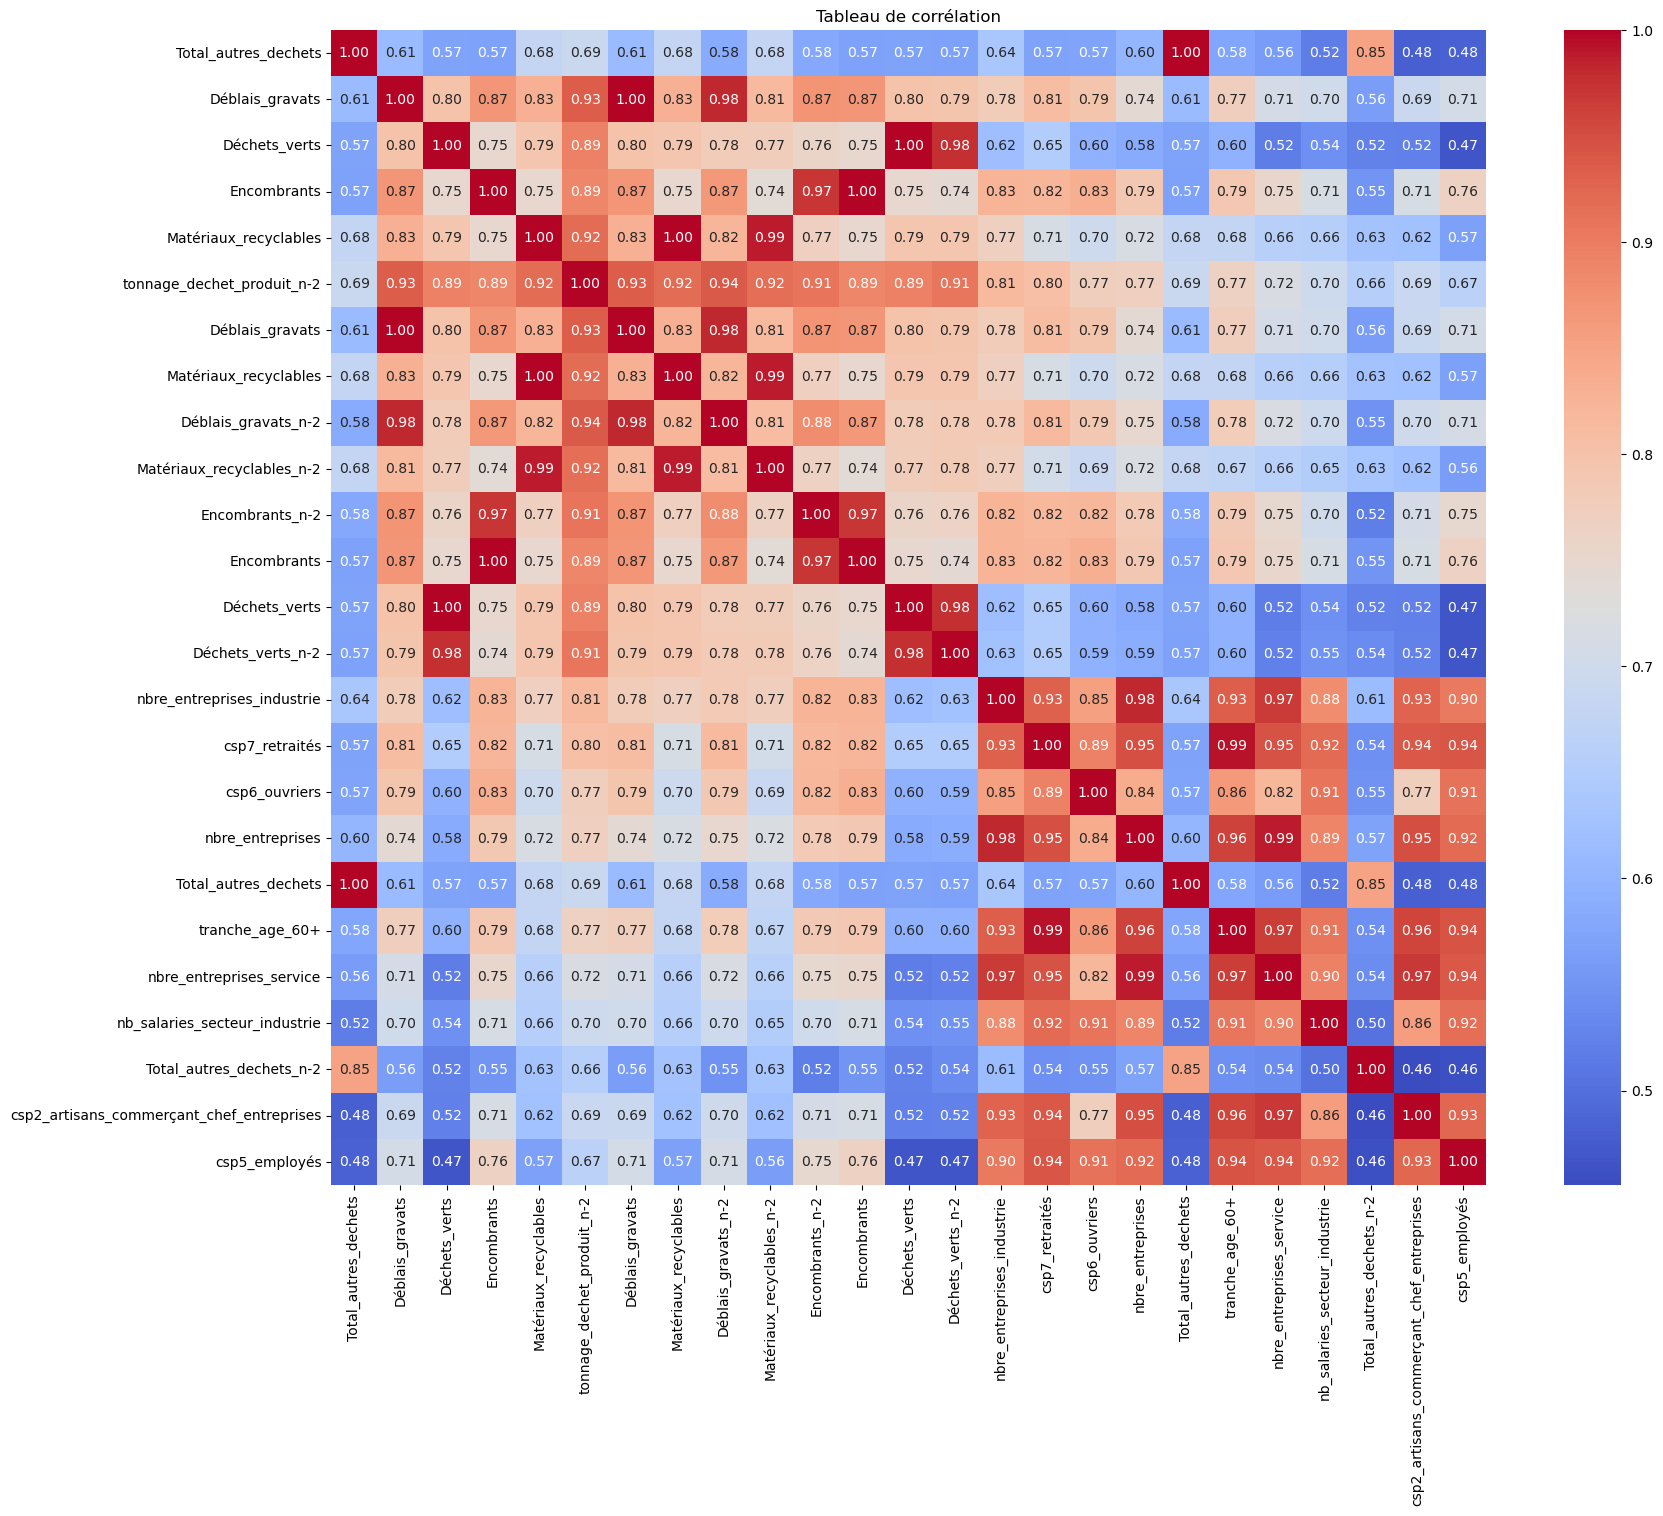

In [219]:
# Tableau correlation sur toutes les targets

variables_cibles = ['Total_autres_dechets', 'Déblais_gravats', 'Déchets_verts', 'Encombrants', 'Matériaux_recyclables']
# correlation =df.corr(numeric_only=True)
# Calculer la corrélation entre les variables cibles et toutes les autres variables
correlations = df.corr(numeric_only=True)[variables_cibles]

# Trouver le top 20 des variables explicatives les plus corrélées avec les variables cibles
top_20_explicatives = correlations.abs().mean(axis=1).sort_values(ascending=False).index[1:21]

# Créer un sous-ensemble du DataFrame avec les variables cibles et le top 20 des variables explicatives
df_subset = df[variables_cibles + list(top_20_explicatives)]

# Calculer la matrice de corrélation pour ce sous-ensemble
corr_matrix = df_subset.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Tableau de corrélation')
plt.show()

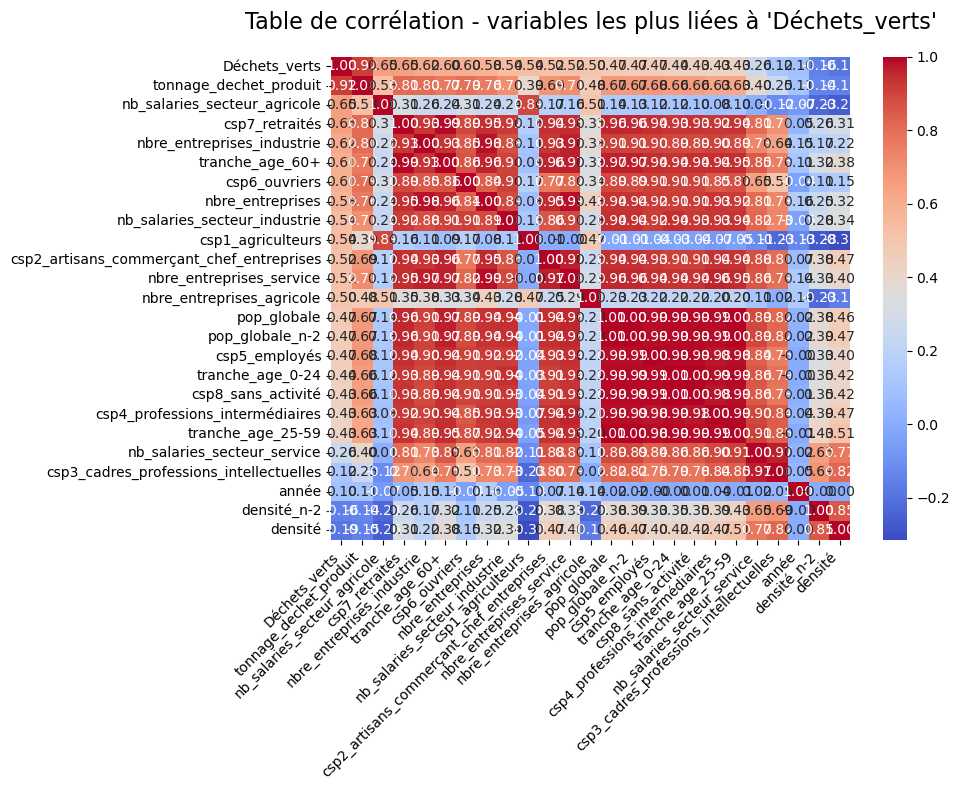

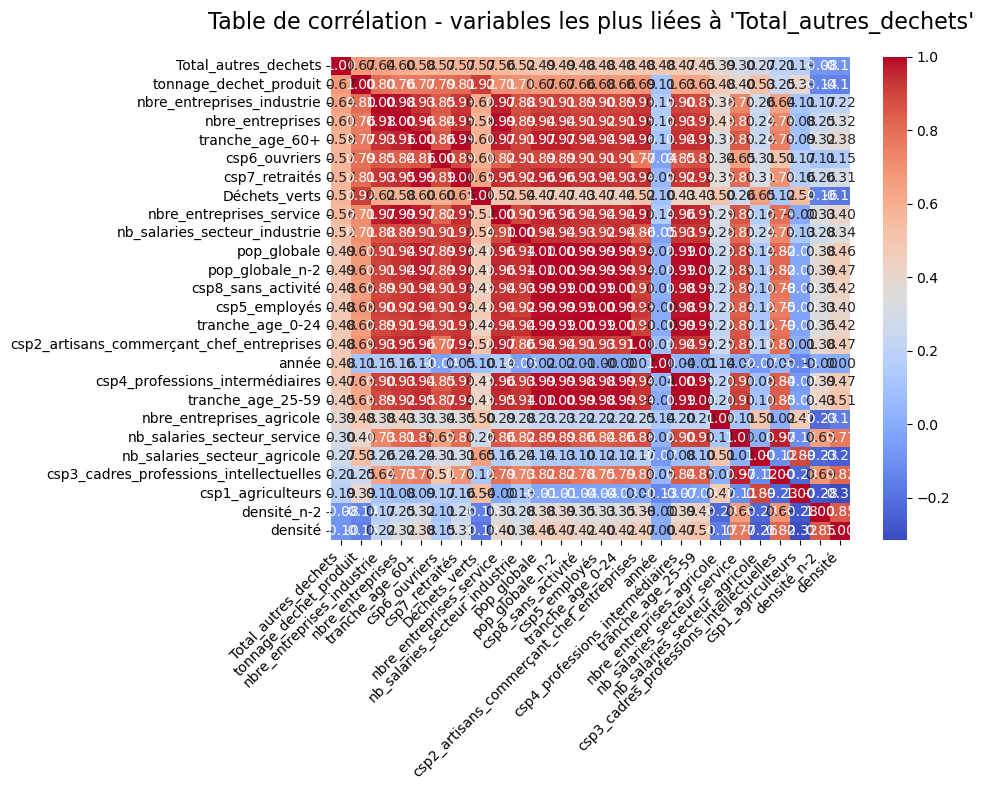

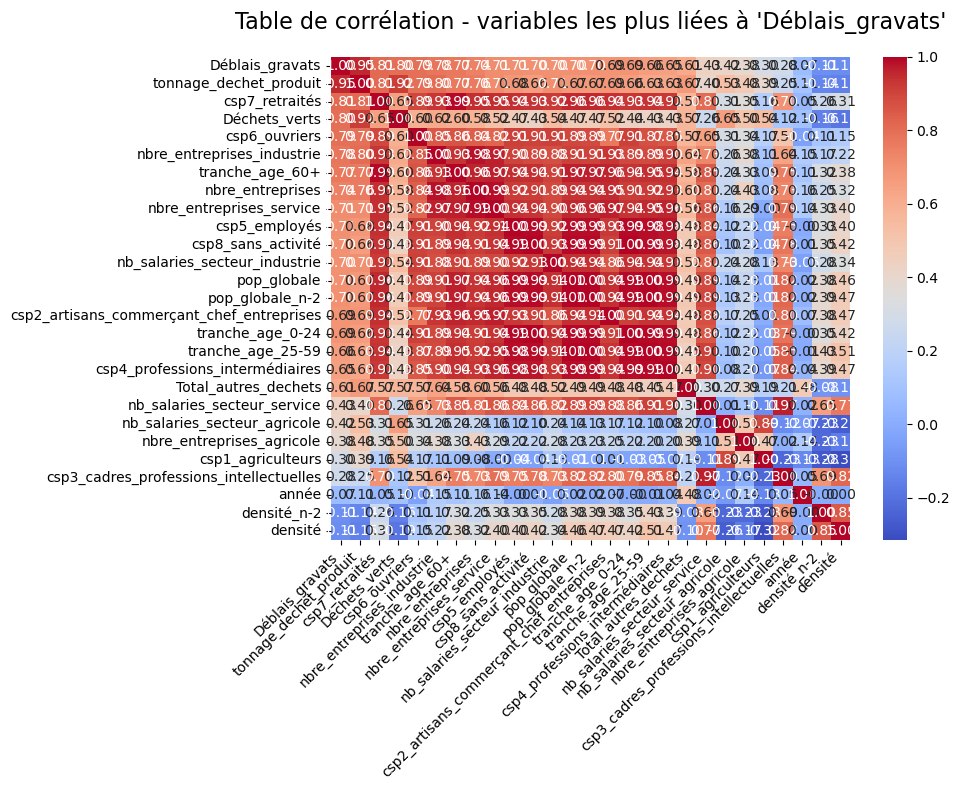

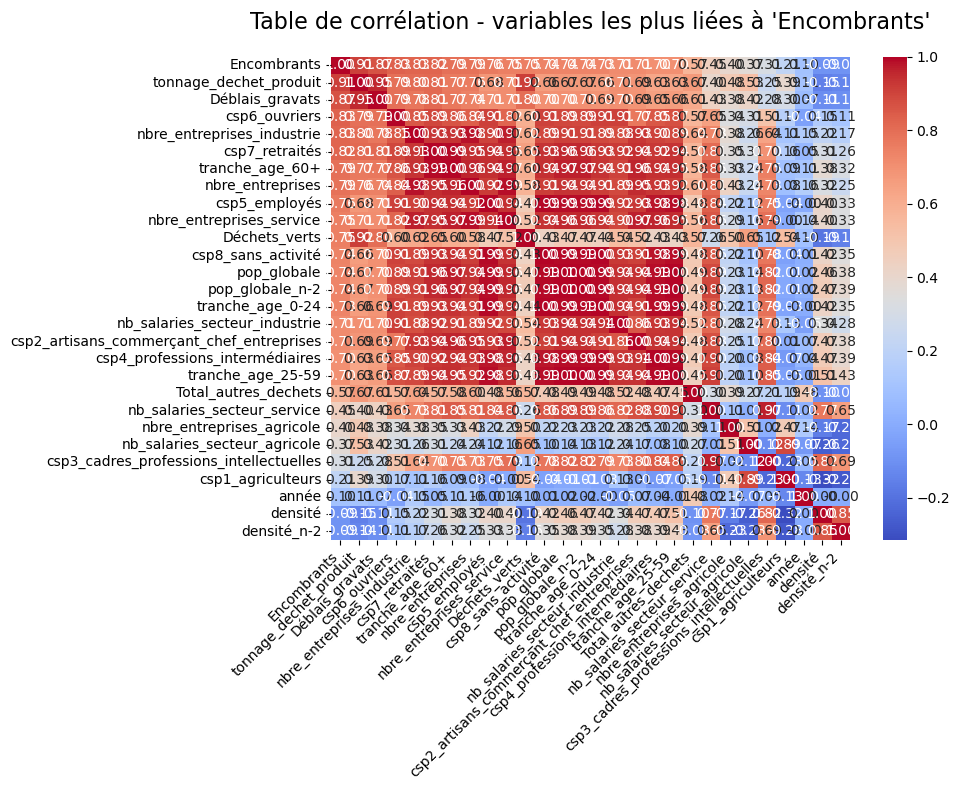

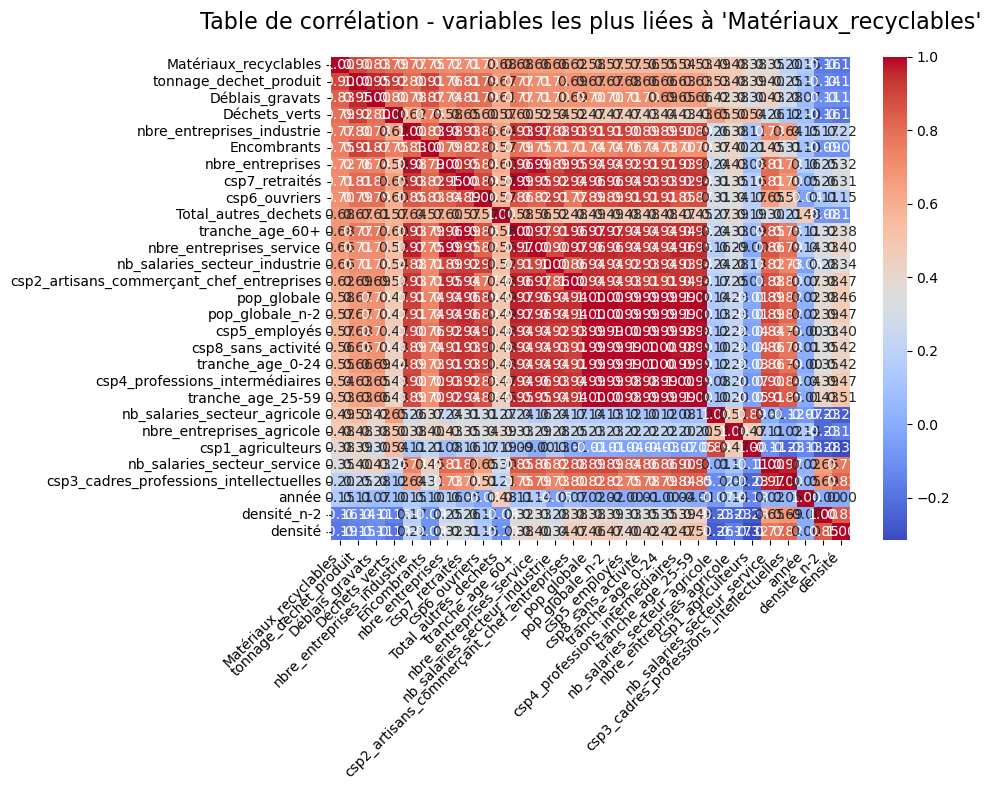

                    Target                                  Feature  \
1            Déchets_verts                   tonnage_dechet_produit   
2            Déchets_verts             nb_salaries_secteur_agricole   
3            Déchets_verts                           csp7_retraités   
4            Déchets_verts               nbre_entreprises_industrie   
5            Déchets_verts                          tranche_age_60+   
..                     ...                                      ...   
130  Matériaux_recyclables              nb_salaries_secteur_service   
131  Matériaux_recyclables  csp3_cadres_professions_intellectuelles   
132  Matériaux_recyclables                                    année   
133  Matériaux_recyclables                              densité_n-2   
134  Matériaux_recyclables                                  densité   

     Correlation  
1       0.917559  
2       0.654753  
3       0.650392  
4       0.618482  
5       0.597513  
..           ...  
130     0.3460

In [230]:
targets=['Déchets_verts', 'Total_autres_dechets', 'Déblais_gravats','Encombrants','Matériaux_recyclables']

# Supprimer typologie des déchets
liste_sup = ['tonnage_dechet_produit_n-2',
       'Total_autres_dechets_n-2', 'Total_autres_dechets',
       'Déblais_gravats_n-2', 'Déblais_gravats', 'Déchets_verts_n-2',
       'Déchets_verts', 'Encombrants_n-2', 'Encombrants',
       'Matériaux_recyclables_n-2', 'Matériaux_recyclables']
# # Initialiser une liste pour stocker les résultats
results = []

for target in targets :
    correlation =df.corr(numeric_only=True)
    correlation_target = correlation[target].sort_values(ascending=False)
    liste_sup = [col for col in liste_sup if col != target]
    correlation_clean = correlation_target.drop(liste_sup)
    top_38 = correlation_clean.head(38)
    # print(f"top_20 de {target} est {top_20}")

    # Stocker les résultats
    for feature, corr_value in top_38.items():
        results.append({'Target': target, 'Feature': feature, 'Correlation': corr_value})

    # visualisation
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[top_38.index].corr(), annot=True, fmt=".2f", cmap="coolwarm")

    plt.title(f"Table de corrélation - variables les plus liées à '{target}'", 

          fontsize=16, 
          loc='center', 
          pad=20)  # pad = espace entre le titre et la heatmap

    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Créer un DataFrame à partir des résultats
# Retirer les targets de la colonne Feature
df_results = pd.DataFrame(results)
df_results = df_results[~df_results['Feature'].isin(targets)] # ~inverse /  retourne un booléen True pour les lignes où 'Feature' est dans targets.

# Affichage
print(df_results)   

In [231]:
# Inversé le df
df_pivot = df_results.pivot_table(
    index='Feature',       # Ce sera l'index (les lignes du tableau)
    columns='Target',      # Les colonnes seront les targets
    values='Correlation',  # Les valeurs du tableau
    aggfunc='first'        # Pas nécessaire ici, mais utile si doublons
).reset_index()

# sup valeur manquante + création col 'moy'
df_pivot_2=df_pivot.dropna()
df_pivot_2['moy'] = df_pivot[targets].mean(axis=1)
df_pivot_2 = df_pivot_2.sort_values(by='moy', ascending=False)

# top 5
df_pivot_3 = df_pivot_2[1:6]
df_pivot_3.drop(columns='moy', inplace=True)

# Transformer le DataFrame en format long
df_melted = df_pivot_3.melt(id_vars=['Feature'], var_name='Target', value_name='Correlation')

# Créer le graphique en barres groupées

color_map = { 
    "Déchets_verts": "green",
    "Déchets dangereux": "red",
    "Déblais_gravats": "orange",
    "Autres déchets": "grey",
    "Matériaux_recyclables": "yellow",
    "Encombrants": "#8B008B",
}
fig = px.bar(df_melted, x='Feature', y='Correlation', color='Target', barmode='group',
             color_discrete_map=color_map, 
             title='Top 5 des corrélations des Features sur les Targets',
             labels={'Correlation': 'Valeur de Corrélation', 'Feature': 'Caractéristique'})

# Afficher le graphique
fig.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_29024\1954413514.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

